# Análise técnica
## Breve resumo sobre análises
Os principais tipos de análises de ativos financeiros são a técnica e a fundamental.

A **análise técnica** foca em analisar o movimento dos preços dos ativos baseados em indicadores para predizer tendências futuras a partir do uso de gráficos e dados históricos (principalmente preço e volume).

A **análise fundamental** estuda as forças econômicas que afetam a oferta e demanda de um ativo, é a base para a construção do _valuation_ de companhias a partir de  informações públicas de reportes da própria empresa.

## Análise técnica
Características importantes:
- Assume que os indicadores baseados no histórico de preços podem ajudar a antever a tendência dos preços;
- Se empenha em identificar as possíveis oportunidades comerciais de um ativo financeiro;
- É usada frequentemente para entender sinais comerciais de curto prazo;

### Tipos de análise técnica

#### Análise gráfica
Baseado no uso de padrões gráficos para predizer preços de ativos:
- Tendência de preço:
    - É uma das mais simples, desenha-se uma linha na direção para qual o preço está indo durante um período de tempo, pode ser:
        - Tendência de baixa;
        - Tendência de alta;
        - Tendência lateral;
- Padrões gráficos:
    - Geralmente utilizada com velas japonesas (_candlesticks_), são chamadas assim pois historicamente foram utilizadas no mercado japones de arroz. Seu formato é composto por duas partes: corpo e sombra. O formato é semelhante à um boxplot, mas pode ser um _candle_ de alta ou baixa;

#### Indicadores técnicos
Baseado em indicadores gerados a partir dos dados históricos dos ativos financeiros:
- Médias móveis;
- Bandas;
- Osciladores;
- Níveis de suporte e resistência;

# Prática

In [37]:
# pip install mplfinance
#conda install ta

In [38]:
pip install ta


  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=68e67741770477aedfe5d804696f09dc423119c30fee801e9272c5ba83671f16
  Stored in directory: c:\users\gabri\appdata\local\pip\cache\wheels\6a\76\03\7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta


In [39]:
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
import mplfinance as mpf
import ta

In [5]:
# Baixando dados da Tesla
dfTesla = yfin.download('TSLA', start = '2020-01-01', end = '2021-01-01')
# dfTesla

[*********************100%***********************]  1 of 1 completed


In [4]:
dfSP = yfin.download('^GSPC', start = '2020-01-01', end = '2021-01-01')
# dfSP

[*********************100%***********************]  1 of 1 completed


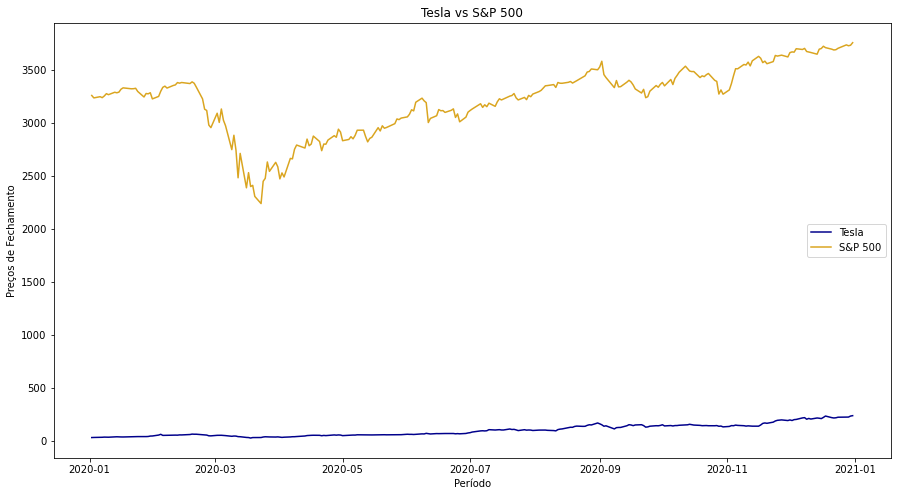

In [11]:
plt.figure(figsize = (15, 8))
plt.plot(dfTesla['Close'], color = 'darkblue')
plt.plot(dfSP['Close'], color = 'goldenrod')
plt.legend(['Tesla', 'S&P 500'], loc = 'center right')
plt.xlabel('Período')
plt.ylabel('Preços de Fechamento')
plt.title('Tesla vs S&P 500')
plt.show()

In [13]:
# Para comparar, é necessário 'escalar' as duas séries de preço
# é entender como o gráfico se comportaria caso pudéssemos comprar apenas um valor fixo (ex: $ 100)
dfTesla['Close_100'] = (100/dfTesla['Close'][0])* dfTesla['Close']
dfSP['Close_100'] = (100/dfSP['Close'][0])* dfSP['Close']

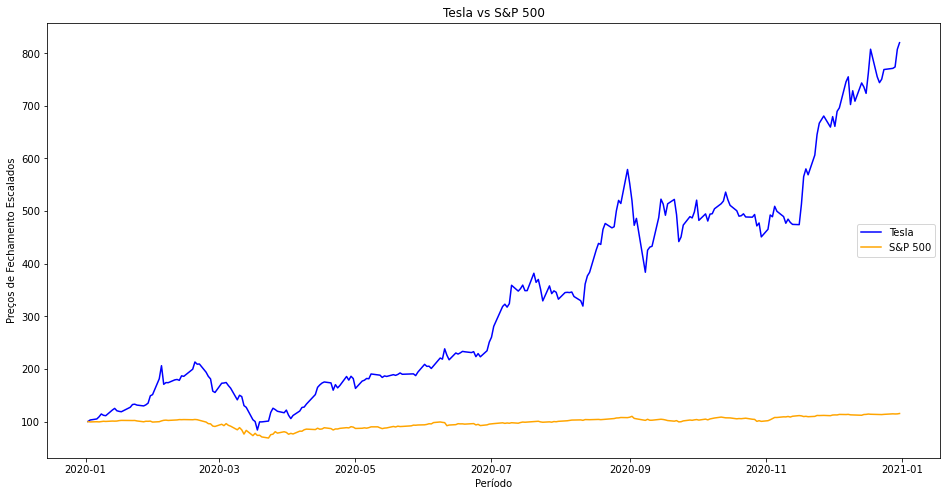

In [21]:
plt.figure(figsize = (16, 8))
plt.plot(dfTesla['Close_100'], color = 'blue')
plt.plot(dfSP['Close_100'], color = 'orange')
plt.legend(['Tesla', 'S&P 500'], loc = 'center right')
plt.xlabel('Período')
plt.ylabel('Preços de Fechamento Escalados')
plt.title('Tesla vs S&P 500')
plt.show()

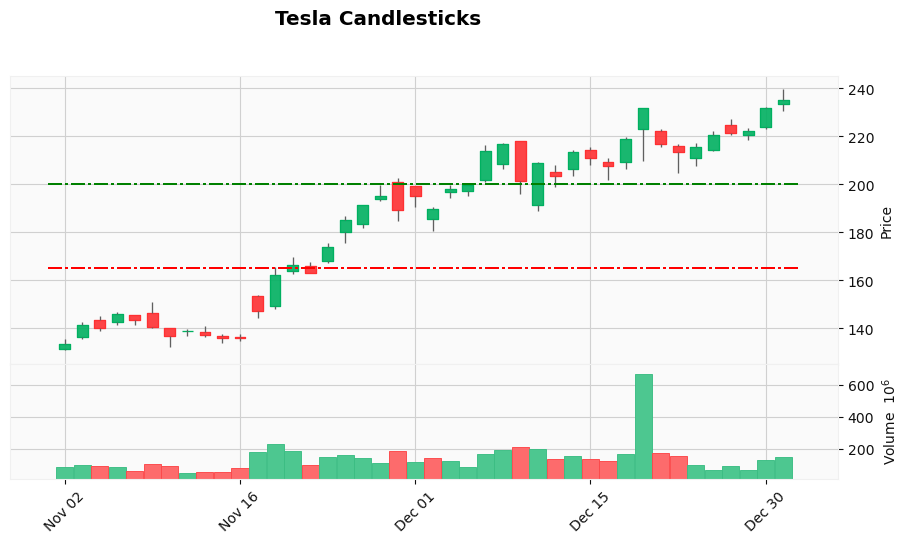

In [28]:
# Transformando o gráfico em um diagrama de velas japonesas (candlesticks)
mpf.plot(
    dfTesla[-42:],
    hlines = dict(hlines = [165, 200], colors = ['red', 'green'], linestyle = '-.'),
    type = 'candle',
    volume = True,
    figratio = (16,8),
    style = 'yahoo',
    title = 'Tesla Candlesticks'
)

In [29]:
# Atividade análise técnica Cemex e Ecopetrol
dfCemex = yfin.download('CX', start = '2020-01-01', end = '2021-01-01')
dfEcoPet = yfin.download('EC', start = '2020-01-01', end = '2021-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


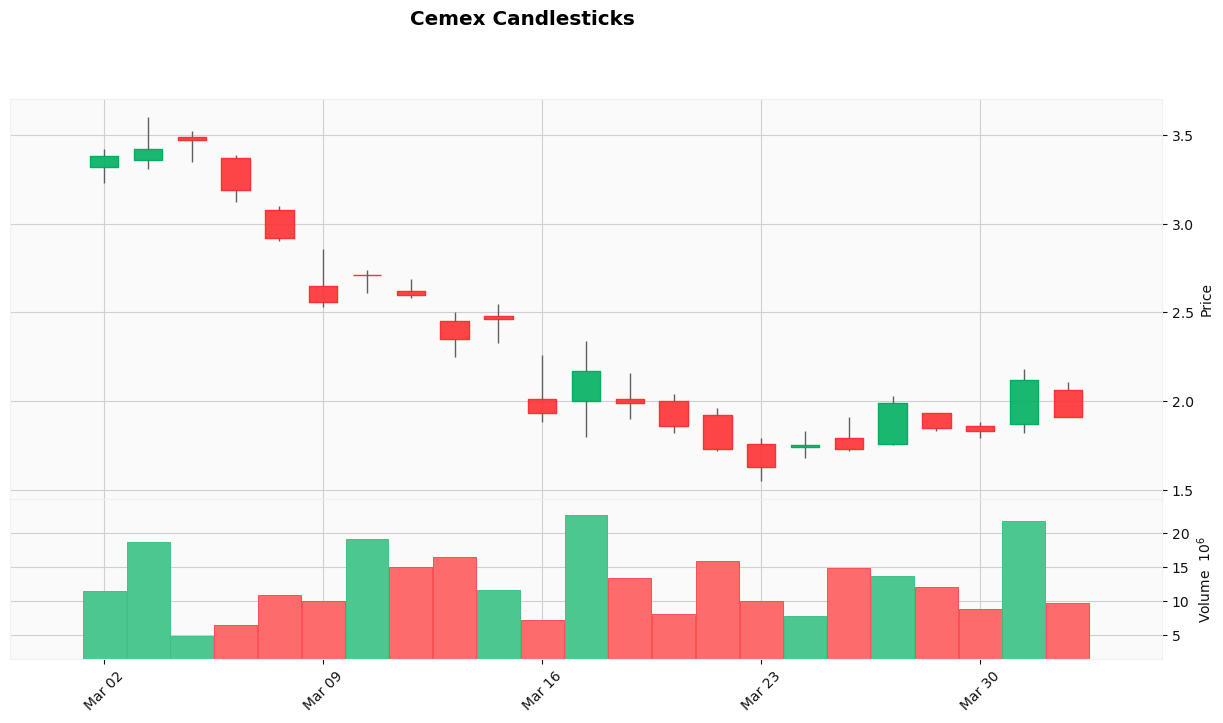

In [31]:
mpf.plot(
    dfCemex['2020-03-01':'2020-04-01'],
    type = 'candle',
    volume = True,
    style = 'yahoo',
    figsize = (16, 8),
    title = 'Cemex Candlesticks'
)

[*********************100%***********************]  1 of 1 completed


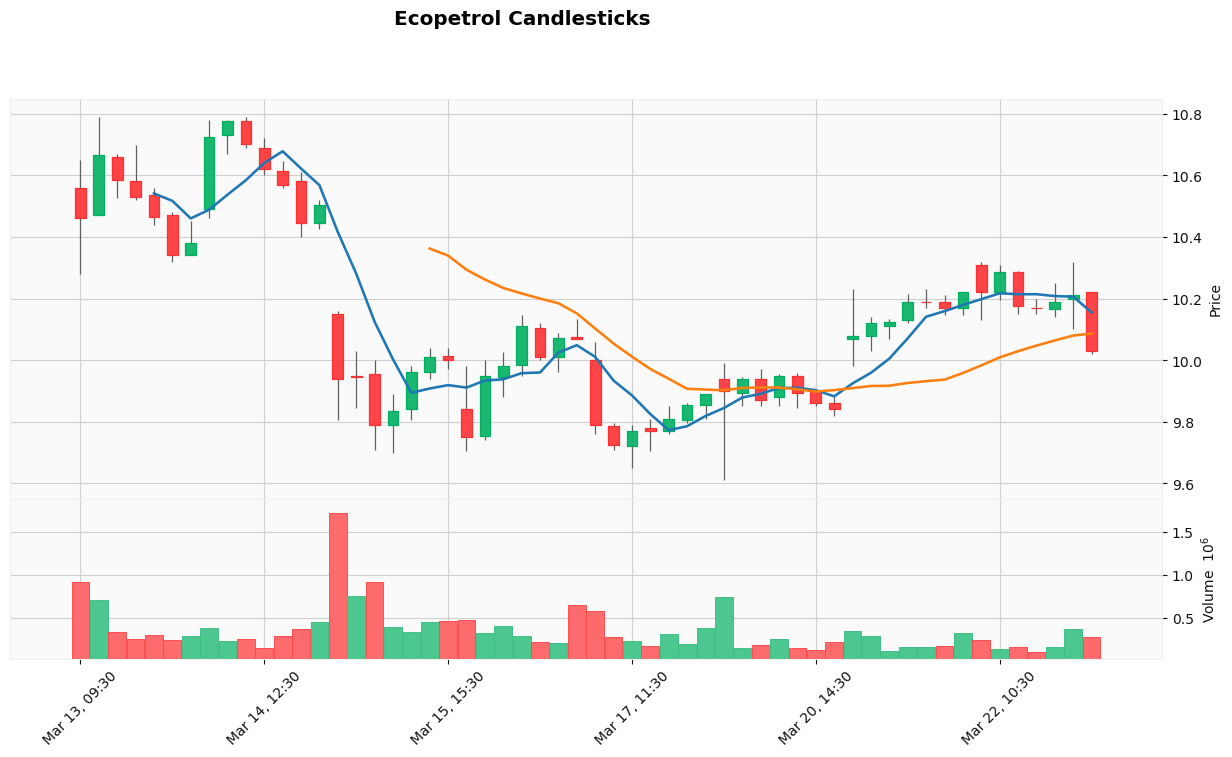

In [46]:
dfEcoPet = yfin.download('EC', start = '2023-03-13', end = '2023-03-23', interval = '1h')
mpf.plot(
    dfEcoPet['2023-03-13':'2023-03-23'],
    type = 'candle',
    volume = True,
    style = 'yahoo',
    figsize = (16, 8),
    title = 'Ecopetrol Candlesticks',
    mav =  (5, 20)
)

# Indicadores na Análise Técnica
Os indicadores ajudam a predizer o comportamento dos preços futuros. Baseando-se no histórico de preços e volumes de um ativo, é possível gerar alguns indicadores. Dessa forma, toma-se decisões a longo prazo.

Dentro dos indicadores técnicos, temos:
- Médias móveis;
- Bandas;
- Osciladores;
- Níveis de suporte e resistência;

## Médias móveis
São medidas estatísticas dos preços, havendo dois tipos:
- Médias móveis simples (SMA): Os preços passados possuem o mesmo peso. É calculada baseada no peso médio, as mais utilizadas são 5, 20, 50 e 200, em que o número de período define a extensão da análise (quanto menor o número de instantes considerados, menor é a projeção). Por último, o uso mais básico das médias móveis são identificar as tendências de alta e baixa, além de também ser possível perceber níveis de suporte e resistência;
- Médias móveis exponenciais (EMA): Os pesos dos preços passados possuem um peso menor, decaindo exponencialmente. Dessa forma, utiliza-se um multiplicador para definir o peso dos preços (geralmente 2), também é utilizado para a identificação de sinais de compra e venda;

## Bandas de Bollinger
Ajudam a identificar se o ativo está sobrecomprado ou sobrevendido, sendo composto por três bandas (superior, média e inferior).
#### Média
Corresponde a uma média móvel simples de 20 períodos da média dos preços máximos, mínimos e fechamentos.
#### Superior e Inferior
Corresponde a média móvel simples de 20 períodos mais ou menos o desvio padrão dos preços.

Em resumo as bandas de bollinger ajudan a detectar possíveis **sobrecompras** ou _sobrevendas_, traduzindo-se em sinais de **venda** ou de _compra_, respectivamente.



## Osciladores
É mais conhecido como média móvel de convergência ou divergência (MACD - _Moving Average of Convergence or Divergence_). É um indicador que mostra a relação entre médias móveis exponenciais, definido como a diferença entre EMA<sub>12</sub> e EMA<sub>26</sub>.
É utilizado para perceber identificar sobrecompra e sobrevenda, podendo ser utilizada para gerar sinais de venda ou compra, respectivamente.
- Caso o valor seja positivo, então a média exponencial de 12 dias é superior a de 26 dias;
- Caso seja negativo, a média exponencial é traduz-se num sinal de tendência de baixa;

## Níveis de Suporte e Resistência: Regressão de Fibonacci
Corresponde a pontos no qual a tendência se altera, esperando-se que o preço se mantenha nesse nível. O nível da regressão são iguais às razões 0%, 23,6%, 38,2%, 50%, 61,8% e 100% de Fibonacci.

É calculado por:

$$
Nível_{\alpha} = P_{max} - {\alpha} * (P_{max} - P_{mín})
$$


In [6]:
dfBTC =  yfin.download('BTC-USD', '2020-07-01', '2021-07-01')
#dfBTC

[*********************100%***********************]  1 of 1 completed


In [13]:
# SMA 5 dias
dfBTC['SMA_short'] = dfBTC['Adj Close'].rolling(window = 5).mean()

# SMA 20 dias
dfBTC['SMA_long'] = dfBTC['Adj Close'].rolling(window = 20).mean()


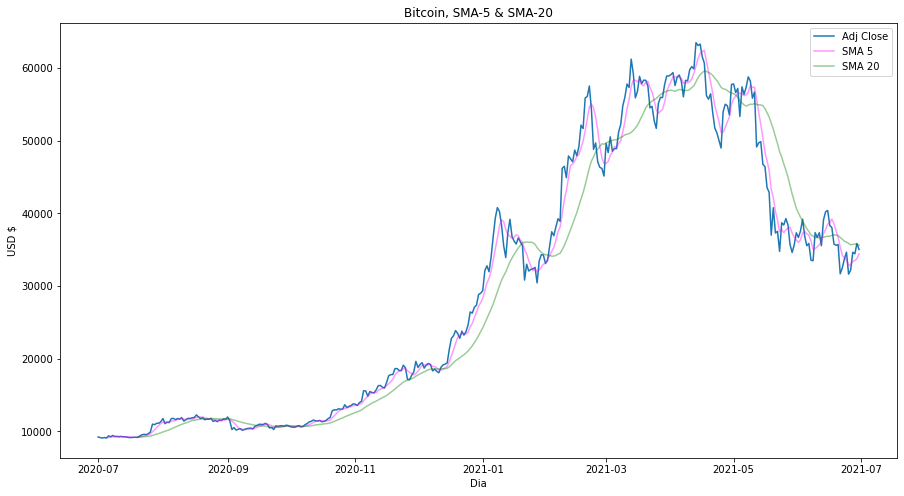

In [22]:
plt.figure(figsize = (15, 8))
plt.title('Bitcoin, SMA-5 & SMA-20')
plt.plot(dfBTC['Adj Close'])
plt.plot(dfBTC['SMA_short'], color = 'magenta', alpha = 0.4)
plt.plot(dfBTC['SMA_long'], color = 'green', alpha = 0.4)
plt.xlabel('Dia')
plt.ylabel('USD $')
plt.legend(['Adj Close', 'SMA 5', 'SMA 20'])
plt.show()

In [24]:
# EMA 5 dias
dfBTC['EMA_short'] = dfBTC['Adj Close'].ewm(span = 5, adjust = False).mean()

# EMA 20 dias
dfBTC['EMA_long'] = dfBTC['Adj Close'].ewm(span = 20, adjust = False).mean()


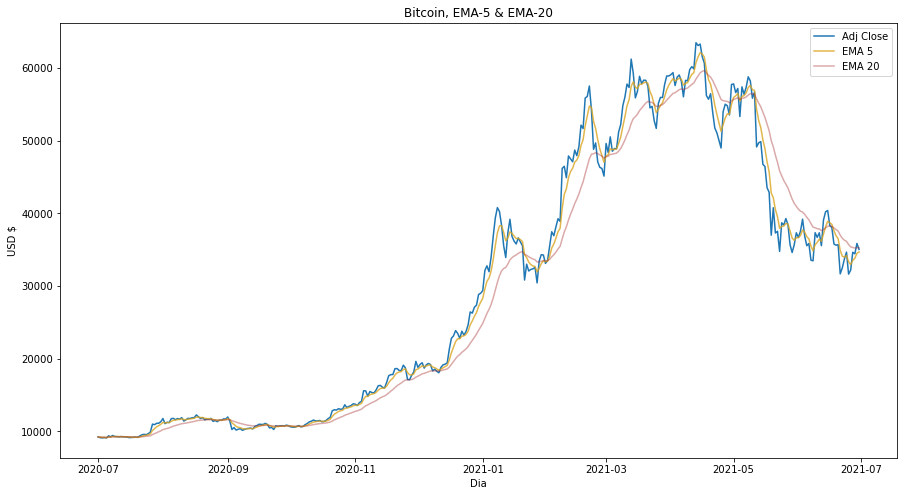

In [40]:
plt.figure(figsize = (15, 8))
plt.title('Bitcoin, EMA-5 & EMA-20')
plt.plot(dfBTC['Adj Close'])
plt.plot(dfBTC['EMA_short'], color = 'goldenrod', alpha = 0.8)
plt.plot(dfBTC['EMA_long'], color = 'brown', alpha = 0.4)
plt.xlabel('Dia')
plt.ylabel('USD $')
plt.legend(['Adj Close', 'EMA 5', 'EMA 20'])
plt.show()

In [45]:
# Bandas de Bollinger
bb = ta.volatility.BollingerBands(close = dfBTC['Close'], window = 20, window_dev = 2)

dfBTC['BOL_M'] = bb.bollinger_mavg()
dfBTC['BOL_U'] = bb.bollinger_hband()
dfBTC['BOL_D'] = bb.bollinger_lband()

# dfBTC

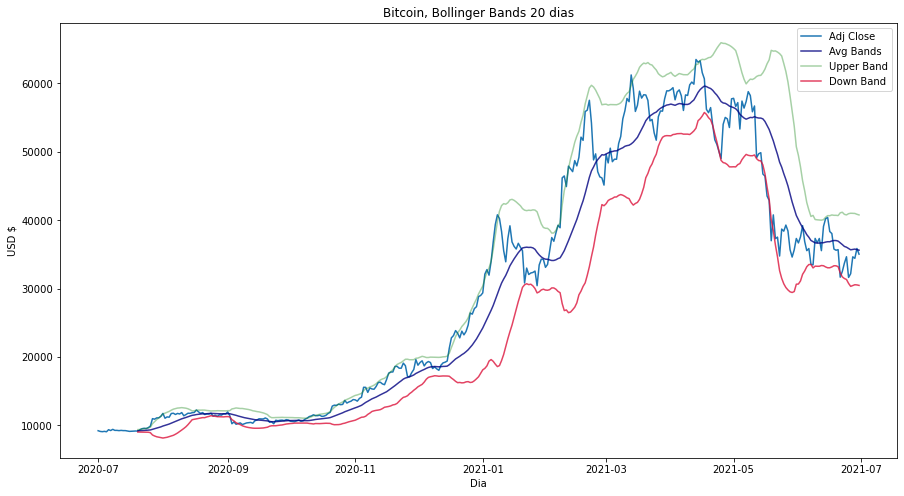

In [50]:
plt.figure(figsize = (15, 8))
plt.title('Bitcoin, Bollinger Bands 20 dias')
plt.plot(dfBTC['Adj Close'])
plt.plot(dfBTC['BOL_M'], color = 'navy', alpha = 0.8)
plt.plot(dfBTC['BOL_U'], color = 'forestgreen', alpha = 0.4)
plt.plot(dfBTC['BOL_D'], color = 'crimson', alpha = 0.8)
plt.xlabel('Dia')
plt.ylabel('USD $')
plt.legend(['Adj Close', 'Avg Bands', 'Upper Band', 'Down Band'])
plt.show()

In [53]:
# MACD 
dfBTC['MACD'] = ta.trend.MACD(close = dfBTC['Close'], window_fast = 12,window_slow = 26).macd()


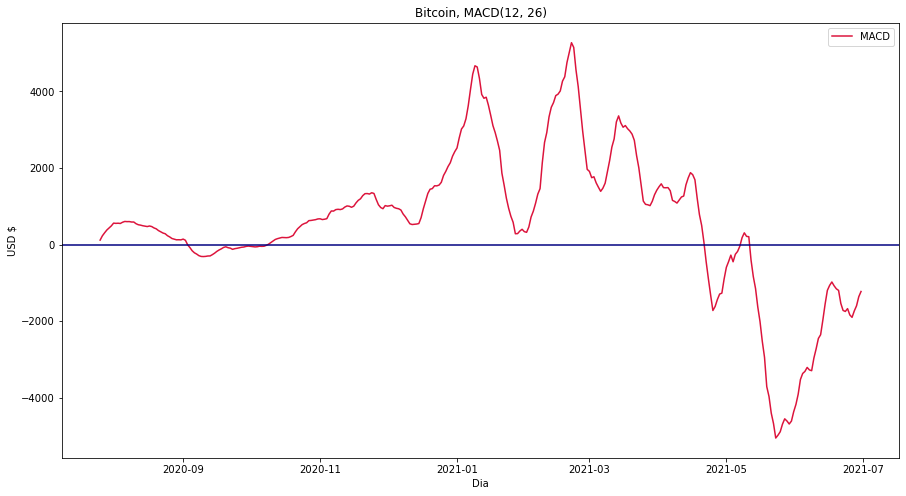

In [56]:
plt.figure(figsize = (15, 8))
plt.title('Bitcoin, MACD(12, 26)')
plt.plot(dfBTC['MACD'], color = 'crimson')
plt.xlabel('Dia')
plt.ylabel('USD $')
plt.legend(['MACD'])
plt.axhline(y = 0, color = 'navy')
plt.show()

In [58]:
# regressão de Fibonacci

max_p = dfBTC['Close'].max()
min_p = dfBTC['Close'].min()
dif_p = max_p - min_p

r_fibo = np.array([0.236, 0.382, 0.5, 0.618])
levels = max_p - dif_p*r_fibo

levels

array([50658.09157422, 42711.38243555, 36288.69970703, 29866.01697852])

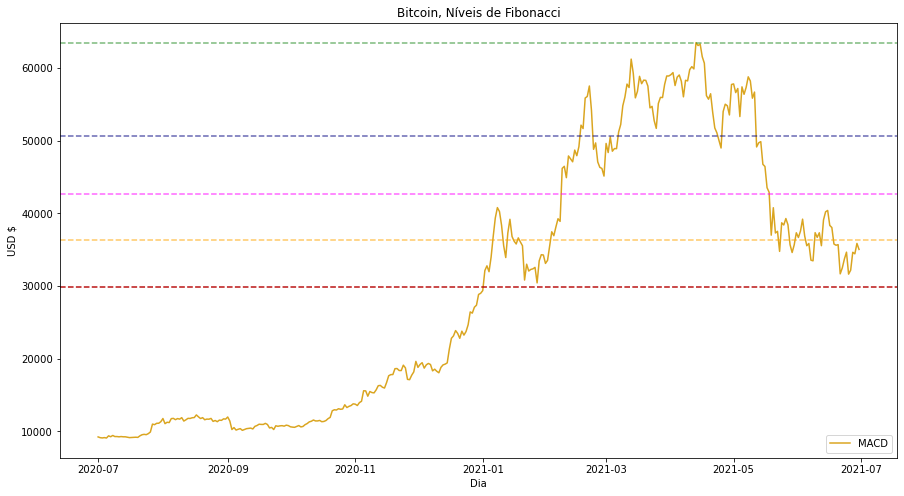

In [62]:
plt.figure(figsize = (15, 8))
plt.title('Bitcoin, Níveis de Fibonacci')
plt.plot(dfBTC['Close'], color = 'goldenrod')
plt.xlabel('Dia')
plt.ylabel('USD $')
plt.legend(['MACD'])

plt.axhline(y = max_p, color = 'forestgreen', linestyle = '--', alpha = 0.6)
plt.axhline(y =  levels[0], color = 'navy', linestyle = '--', alpha = 0.6)
plt.axhline(y =  levels[1], color = 'magenta', linestyle = '--', alpha = 0.6)
plt.axhline(y =  levels[2], color = 'orange', linestyle = '--', alpha = 0.6)
plt.axhline(y =  levels[3], color = 'red', linestyle = '--', alpha = 0.6)
plt.axhline(y =  levels[3], color = 'darkred', linestyle = '--', alpha = 0.6)

plt.show()

In [68]:
# Avaliativo
dfBVN = yfin.download('BVN', '2020-07-01', '2020-10-30')
dfBVN['SMA5'] = dfBVN['Close'].rolling(window =  5).mean()
dfBVN['SMA20'] = dfBVN['Close'].rolling(window =  20).mean()
# dfBVN.head(21)

[*********************100%***********************]  1 of 1 completed


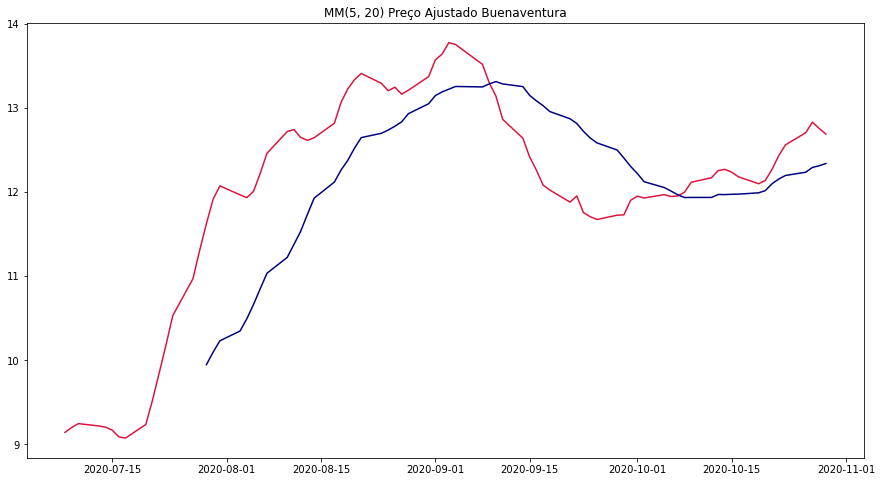

In [70]:
dfBVN['SMA5'] = dfBVN['Adj Close'].rolling(window =  5).mean()
dfBVN['SMA20'] = dfBVN['Adj Close'].rolling(window =  20).mean()

plt.figure(figsize = (15, 8))
plt.title('MM(5, 20) Preço Ajustado Buenaventura')
plt.plot(dfBVN['SMA5'], color = 'crimson')
plt.plot(dfBVN['SMA20'], color = 'navy')
plt.show()

In [85]:
dfBVN['EMA5'] = dfBVN['Close'].ewm(span =  5).mean()
dfBVN['EMA20'] = dfBVN['Close'].ewm(span =  20).mean()

dfBVN.tail()




,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA20,EMA5,EMA20,Bol_M,Bol_U,Bol_L,Bol_D,MACD
Date,,,,,,,,,,,,,,,
2020-10-23,13.01,13.17,12.77,12.97,12.763363,490900,12.560645,12.196540,12.819563,12.521833,11492.308984,12871.750453,10112.867516,10112.867516,0.105901
2020-10-26,12.92,13.20,12.79,12.89,12.684638,628300,12.704319,12.234918,12.843042,12.556907,11849.666748,13430.227139,10269.106357,10269.106357,0.120841
2020-10-27,12.80,13.44,12.69,13.30,13.088105,1043500,12.830280,12.291994,12.995361,12.627695,11998.929248,13666.720005,10331.138491,10331.138491,0.163875
2020-10-28,12.88,12.88,12.45,12.62,12.418939,1240700,12.755490,12.311676,12.870241,12.626962,12116.709229,13794.544751,10438.873706,10438.873706,0.141479
2020-10-29,12.50,12.90,12.27,12.69,12.487823,532600,12.688574,12.338737,12.810160,12.632967,12235.380469,13934.337204,10536.423733,10536.423733,0.127904


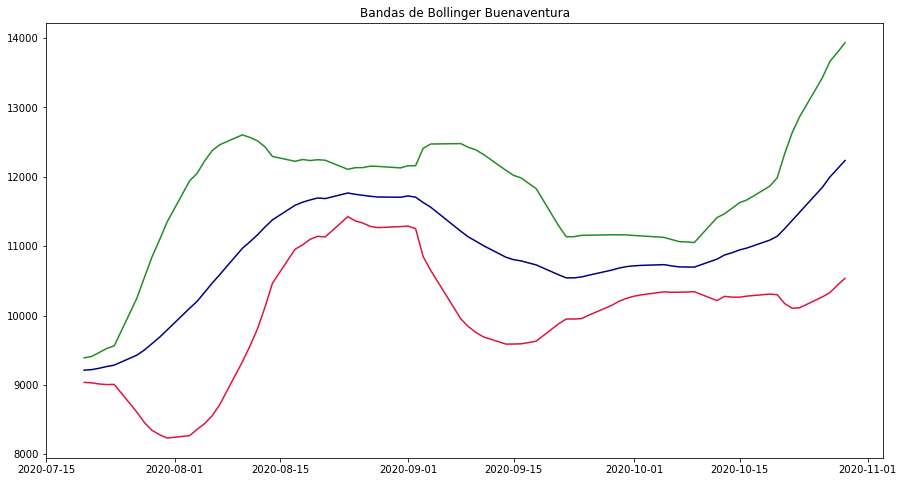

In [80]:
bbBVN = ta.volatility.BollingerBands(close = dfBTC['Close'], window = 20, window_dev = 2)

dfBVN['Bol_M'] = bbBVN.bollinger_mavg()
dfBVN['Bol_U'] = bbBVN.bollinger_hband()
dfBVN['Bol_D'] = bbBVN.bollinger_lband()

plt.figure(figsize = (15, 8))
plt.title('Bandas de Bollinger Buenaventura')
plt.plot(dfBVN['Bol_M'], color = 'navy')
plt.plot(dfBVN['Bol_D'], color = 'crimson')
plt.plot(dfBVN['Bol_U'], color = 'forestgreen')
plt.show()



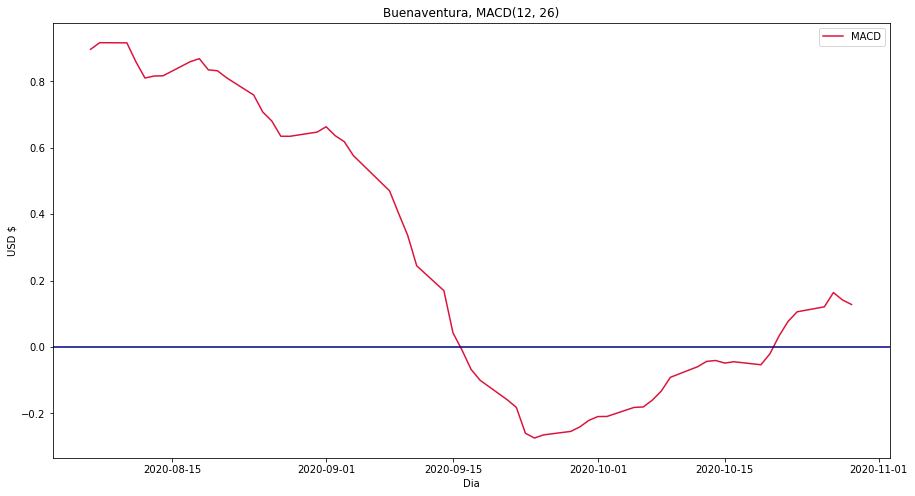

In [82]:
dfBVN['MACD'] = ta.trend.MACD(close = dfBVN['Close'], window_fast = 12,window_slow = 26).macd()

plt.figure(figsize = (15, 8))
plt.title('Buenaventura, MACD(12, 26)')
plt.plot(dfBVN['MACD'], color = 'crimson')
plt.xlabel('Dia')
plt.ylabel('USD $')
plt.legend(['MACD'])
plt.axhline(y = 0, color = 'navy')
plt.show()